# Assignment 2
- Dataset used: Adult Income from UCI with 14 features amd 48842 instances
- This is a classification model
- Train and test split is 80:20
- Scaled using Standard Scaler
- 6 Models are trained and tested
- Evaluated and deployed using streamlit

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from ucimlrepo import fetch_ucirepo
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
data = fetch_ucirepo(id=2)
df = data.data.original
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# to check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# to know the stat of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# to find any missing values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
# no. of rows and cols
df.shape

(48842, 15)

In [7]:
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
print(f'No. of rows and cols post dropping the missing rows are:{df.shape}')

No. of rows and cols post dropping the missing rows are:(47621, 15)


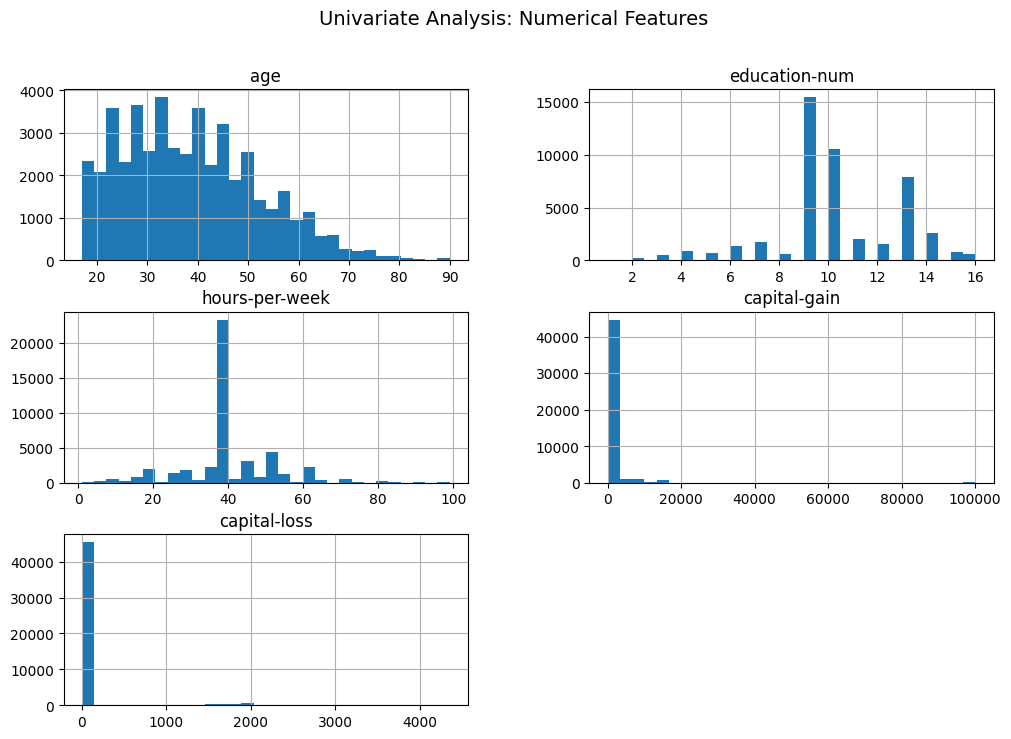

In [9]:
# univariate analysis
num_cols = ["age", "education-num", "hours-per-week", "capital-gain", "capital-loss"]

df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Univariate Analysis: Numerical Features", fontsize=14)
plt.show()

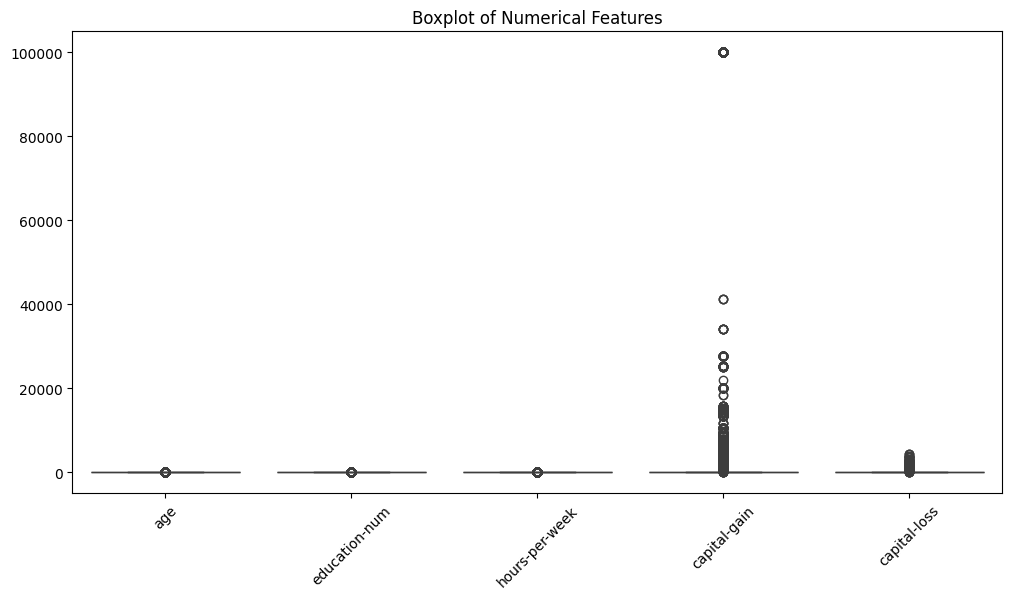

In [10]:
# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

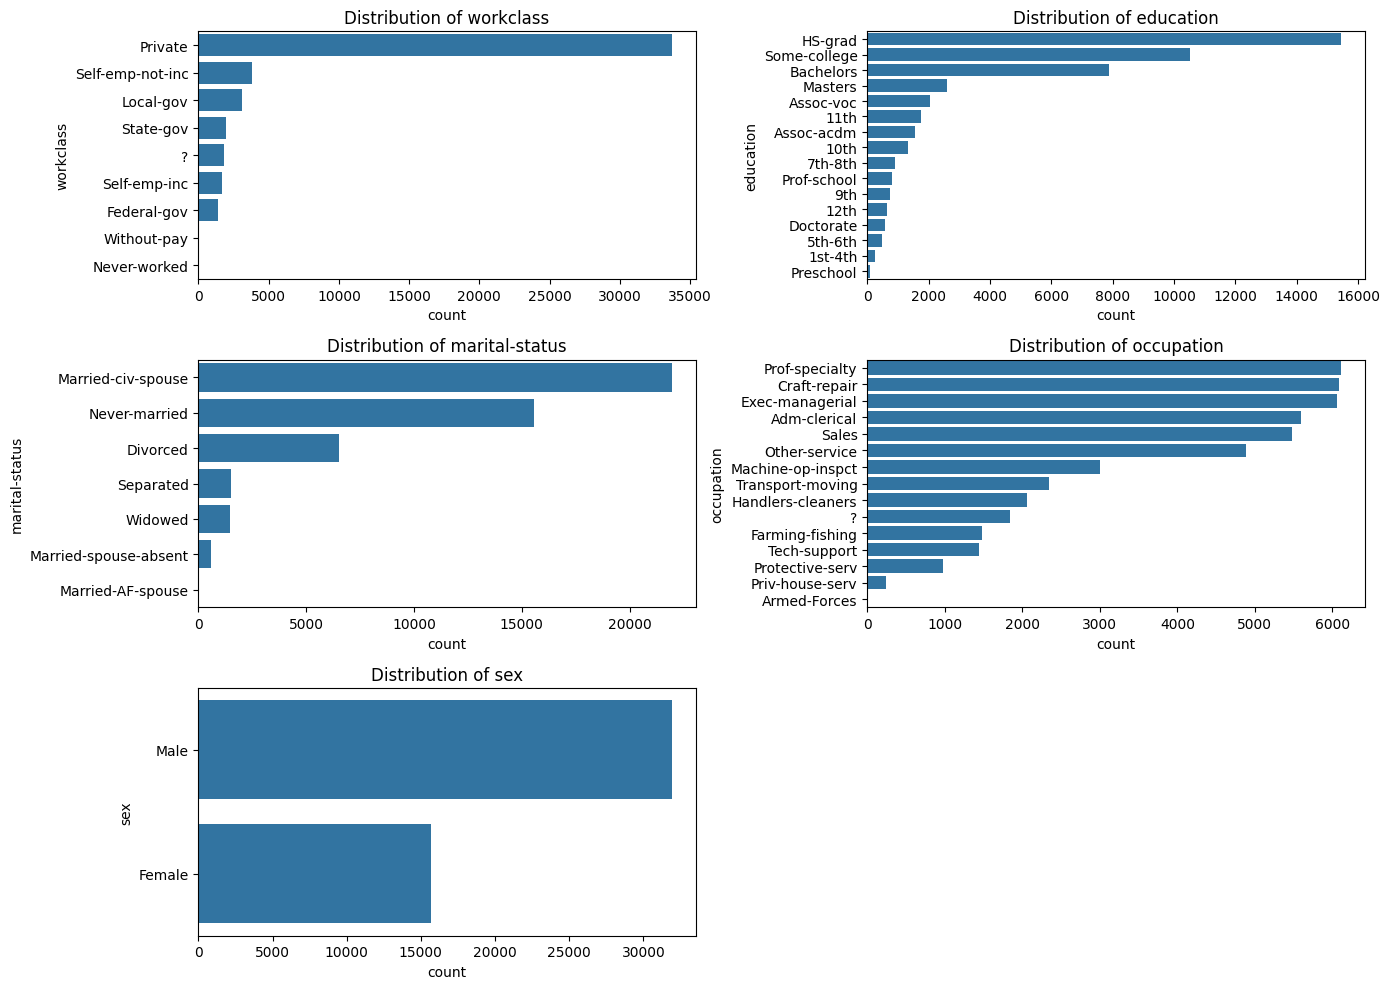

In [11]:
# count plots
cat_cols = ["workclass", "education", "marital-status", "occupation", "sex"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

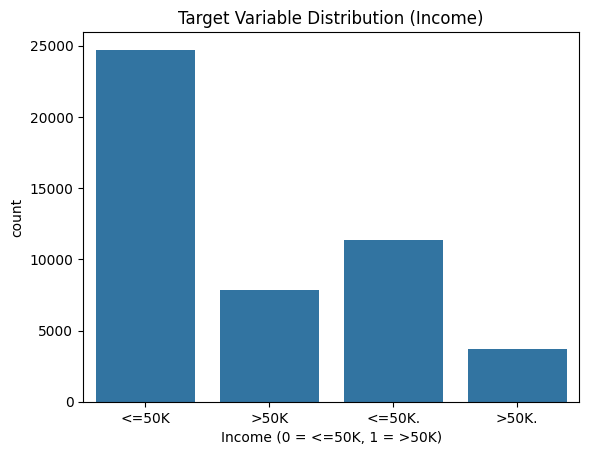

In [12]:
# target variable dist
sns.countplot(x=df["income"])
plt.title("Target Variable Distribution (Income)")
plt.xlabel("Income (0 = <=50K, 1 = >50K)")
plt.show()

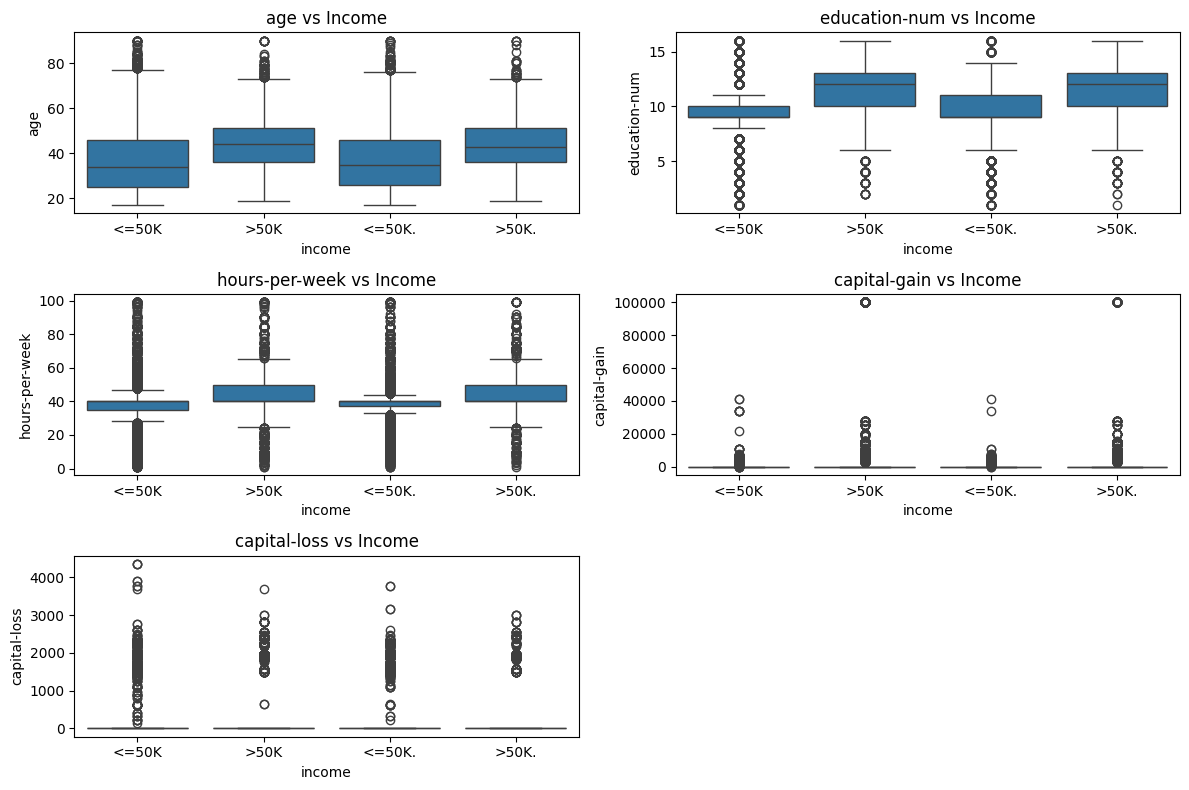

In [13]:
# Bivariate analysis
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="income", y=col, data=df)
    plt.title(f"{col} vs Income")

plt.tight_layout()
plt.show()

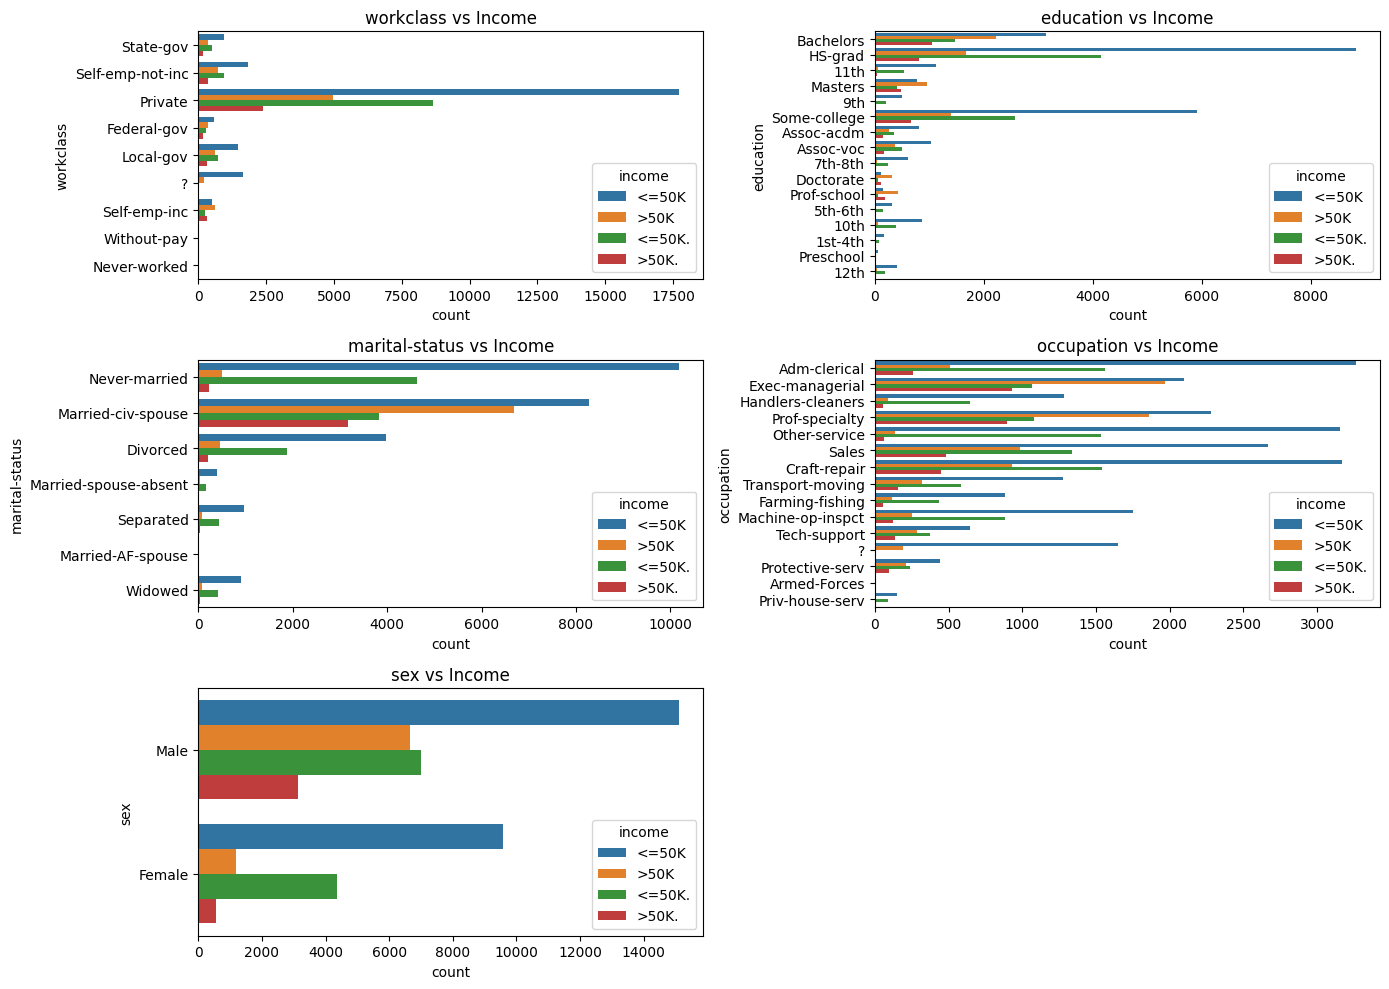

In [14]:
# cat vs target
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=col, hue="income", data=df)
    plt.title(f"{col} vs Income")

plt.tight_layout()
plt.show()

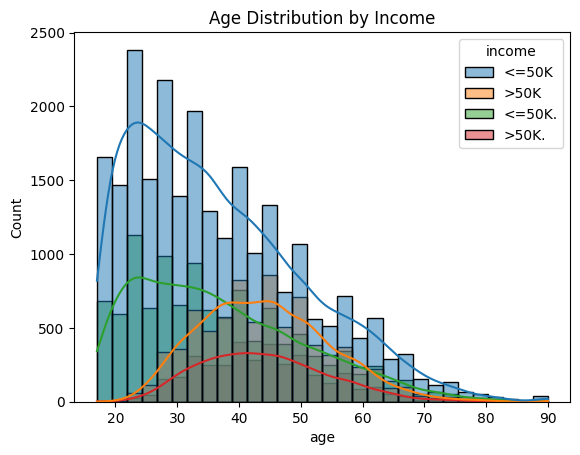

In [15]:
# age vs income
sns.histplot(data=df, x="age", hue="income", bins=30, kde=True)
plt.title("Age Distribution by Income")
plt.show()

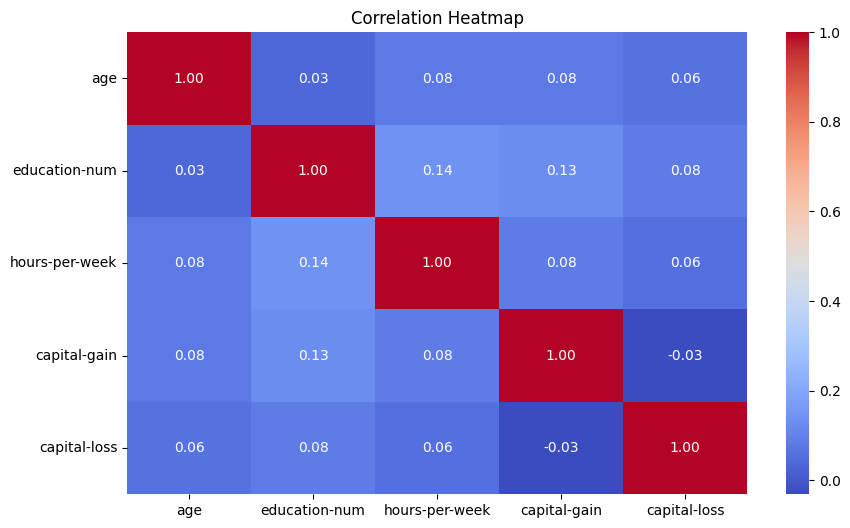

In [16]:
# Multivariate analysis
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

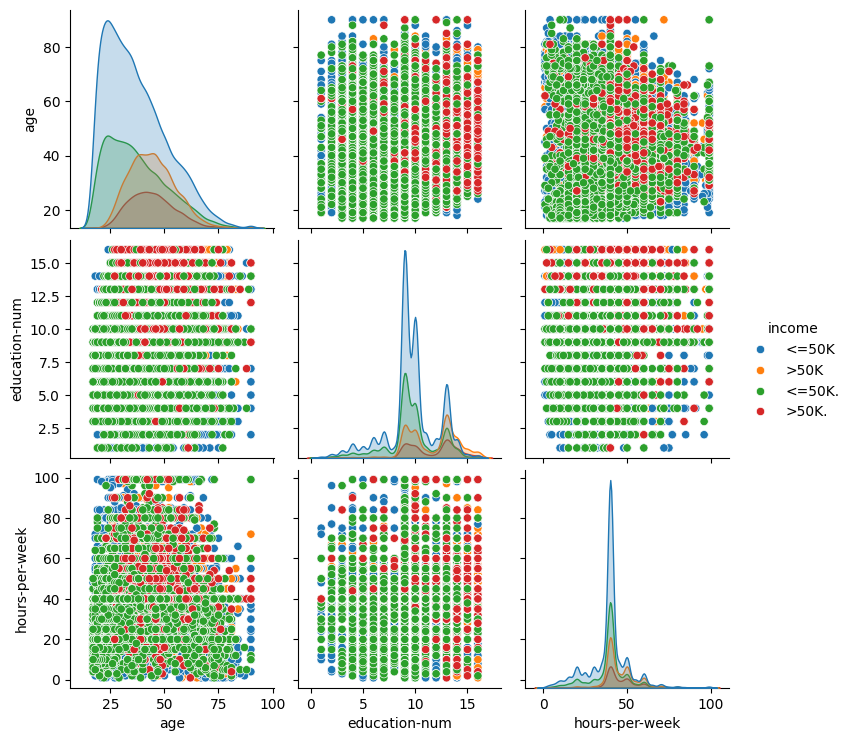

In [17]:
# pairplot
sns.pairplot(
    df,
    vars=["age", "education-num", "hours-per-week"],
    hue="income",
    diag_kind="kde"
)
plt.show()

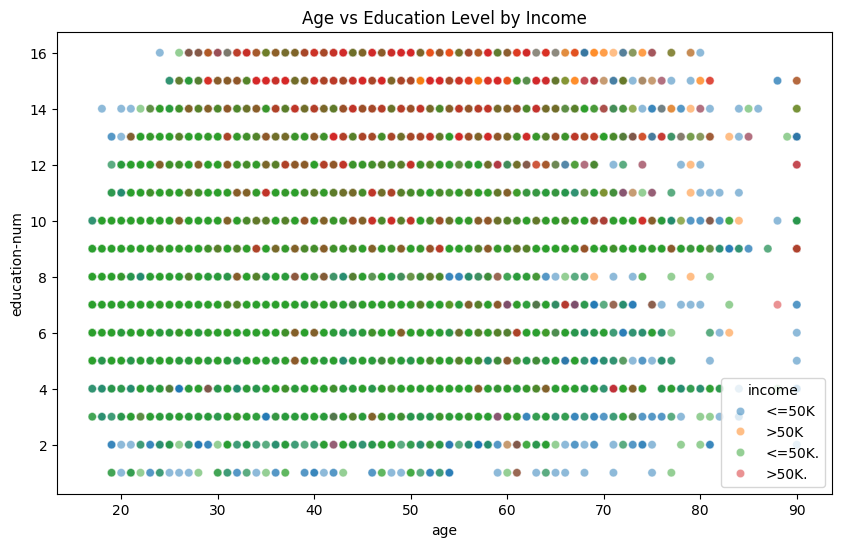

In [18]:
# multivar relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="age",
    y="education-num",
    hue="income",
    data=df,
    alpha=0.5
)
plt.title("Age vs Education Level by Income")
plt.show()


In [19]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [20]:
df['income'].replace({'<=50K.':'<=50K', '>50K.':'>50K'}, inplace=True)
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [21]:
# feature and target selection
X = df.drop(columns=['income'], axis=1)
y = df['income'].map({">50K":1,"<=50K":0})

In [22]:
X = pd.get_dummies(X, drop_first=True)

In [23]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [24]:
print(f'Shape of X Train:{X_train.shape}')
print(f'Shape of X Test:{X_test.shape}')
print(f'Shape of Y Train:{y_train.shape}')
print(f'Shape of Y Test:{y_test.shape}')

Shape of X Train:(38096, 100)
Shape of X Test:(9525, 100)
Shape of Y Train:(38096,)
Shape of Y Test:(9525,)


In [25]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
print(X.isnull().sum().sum())  # Should be 0
print(y.isnull().sum()) 

0
0


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 47621, dtype: int64

In [28]:
# model eval
def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]

    return {
        "Accuracy": accuracy_score(y_te, y_pred),
        "AUC": roc_auc_score(y_te, y_prob),
        "Precision": precision_score(y_te, y_pred),
        "Recall": recall_score(y_te, y_pred),
        "F1 Score": f1_score(y_te, y_pred),
        "MCC": matthews_corrcoef(y_te, y_pred)
    }

# -----------------------------
# Models
# -----------------------------
results = {}

results["Logistic Regression"] = evaluate_model(
    LogisticRegression(max_iter=1000),
    X_train_scaled, X_test_scaled, y_train, y_test
)

results["Decision Tree"] = evaluate_model(
    DecisionTreeClassifier(random_state=42),
    X_train, X_test, y_train, y_test
)

results["KNN"] = evaluate_model(
    KNeighborsClassifier(n_neighbors=5),
    X_train_scaled, X_test_scaled, y_train, y_test
)

results["Naive Bayes"] = evaluate_model(
    GaussianNB(),
    X_train_scaled, X_test_scaled, y_train, y_test
)

results["Random Forest"] = evaluate_model(
    RandomForestClassifier(n_estimators=200, random_state=42),
    X_train, X_test, y_train, y_test
)

results["XGBoost"] = evaluate_model(
    XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ),
    X_train, X_test, y_train, y_test
)

# -----------------------------
# Results Table
# -----------------------------
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy       AUC  Precision    Recall  F1 Score  \
Logistic Regression  0.848819  0.902981   0.726042  0.603986  0.659413   
Decision Tree        0.812388  0.747889   0.610804  0.622184  0.616441   
KNN                  0.819948  0.840299   0.644142  0.574090  0.607102   
Naive Bayes          0.558845  0.800109   0.348480  0.943674  0.508997   
Random Forest        0.853858  0.906808   0.730847  0.628250  0.675676   
XGBoost              0.874961  0.928788   0.792562  0.655546  0.717572   

                          MCC  
Logistic Regression  0.567250  
Decision Tree        0.492317  
KNN                  0.492185  
Naive Bayes          0.342299  
Random Forest        0.584821  
XGBoost              0.642939  


In [29]:
# Saving the models
# Save scaler
joblib.dump(scaler, "model/scaler.pkl")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

# Train and save each model
for name, model in models.items():
    if name in ["Logistic Regression", "kNN", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    joblib.dump(model, f"model/{name.replace(' ', '_').lower()}.pkl")
    print(f"{name} saved successfully!")

Logistic Regression saved successfully!
Decision Tree saved successfully!
kNN saved successfully!
Naive Bayes saved successfully!
Random Forest saved successfully!
XGBoost saved successfully!


In [30]:
joblib.dump(X.columns, "model/feature_columns.pkl")

['model/feature_columns.pkl']